In [3]:
import numpy as np
import pandas as pd

In [4]:
df= pd.read_csv('simple.csv')

In [5]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [8]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat_cols:
  le.fit(df[i])

  df[i]=le.transform(df[i])

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

[]

In [11]:
df.corr()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
Age,1.000000,0.235343,0.699464,0.170254,-0.517723,0.055390,-0.713803,0.205362
Gender,0.235343,1.000000,0.495738,0.248671,0.278362,-0.442139,-0.031519,-0.247729
Income,0.699464,0.495738,1.000000,0.369449,-0.471004,0.084547,-0.704928,0.083698
Education,0.170254,0.248671,0.369449,1.000000,-0.067797,0.047311,-0.397043,0.334424
Marital Status,-0.517723,0.278362,-0.471004,-0.067797,1.000000,-0.696984,0.708374,-0.205756
Number of Children,0.055390,-0.442139,0.084547,0.047311,-0.696984,1.000000,-0.497129,0.136517
Home Ownership,-0.713803,-0.031519,-0.704928,-0.397043,0.708374,-0.497129,1.000000,-0.293384
Credit Score,0.205362,-0.247729,0.083698,0.334424,-0.205756,0.136517,-0.293384,1.000000


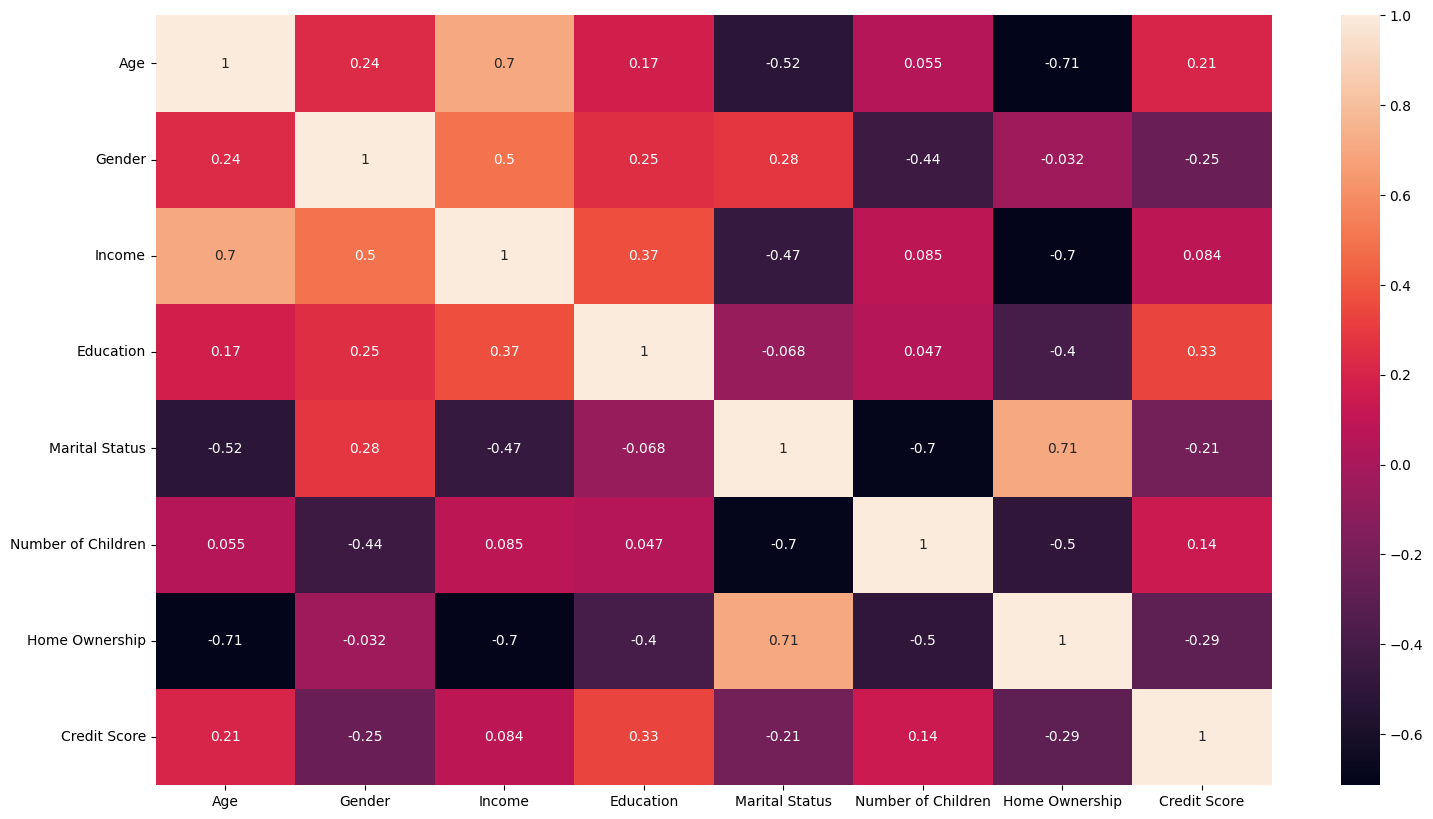

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
84,53,1,125000,0,0,0,0
2,35,0,75000,2,0,1,0
94,30,1,117500,4,0,2,0
45,47,0,90000,2,0,1,0
42,32,1,57500,0,1,0,1


In [16]:
#since the target column is a multi class so we need to see that whether its imbalanced or not
class_counts =  df['Credit Score'].value_counts()
class_counts

,count
Credit Score,
1,113
0,36
2,15


In [40]:
! pip uninstall scikit-learn imbalanced-learn -y


Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0


In [41]:
!pip install scikit-learn==1.3.2 imbalanced-learn==0.12.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 17.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.3.2 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.3.2 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.


In [18]:
# since its a imbalanced dataset so we will apply smote (a technique for resampling )
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=42)

X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

In [19]:
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: Credit Score
1    90
0    31
2    10
Name: count, dtype: int64
Class distribution after resampling: Credit Score
1    90
0    90
2    90
Name: count, dtype: int64


In [21]:
y_train_res.head()

,Credit Score
0,1
1,1
2,1
3,1
4,0


In [22]:
# No we will normalize the dataframe
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf = scaler.fit_transform(X_train_res)
X_test_trf = scaler.transform(X_test)

In [97]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout

In [27]:
model= Sequential()
model.add(Dense(16,activation='relu',input_dim=7))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179 (716.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [30]:
model.fit(X_train_trf,y_train_res,epochs=10,validation_split=0.2,batch_size=24)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5478 - loss: 0.9675 - val_accuracy: 0.3704 - val_loss: 0.9228
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6896 - loss: 0.8811 - val_accuracy: 0.3519 - val_loss: 0.9239
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8065 - loss: 0.8326 - val_accuracy: 0.0000e+00 - val_loss: 0.9348
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7998 - loss: 0.7734 - val_accuracy: 0.0000e+00 - val_loss: 0.9340
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8204 - loss: 0.7214 - val_accuracy: 0.0000e+00 - val_loss: 0.9368
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8013 - loss: 0.6745 - val_accuracy: 0.0000e+00 - val_loss: 0.9328
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7924 - loss: 0.6496 - val_accuracy: 0.0000e+00 - val_loss: 0.9299
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7995 - loss: 0.5941 - val_accuracy: 0.0000e

In [31]:
! pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [32]:
import kerastuner as kt

/tmp/ipython-input-1967655440.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [37]:
def build_model(hp):
  model=Sequential()

  model.add(Dense(16,activation='relu',input_dim=7))
  model.add(Dense(3,activation='softmax'))

  optimizer= hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])

  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  return model

In [39]:
tuner = kt.RandomSearch(build_model,max_trials=3,objective='val_accuracy',directory='my_dir',project_name='srk1')


In [40]:
tuner.search(X_train_trf,y_train_res,epochs=10,validation_data=(X_test_trf,y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.9090909361839294

Best val_accuracy So Far: 0.9090909361839294
Total elapsed time: 00h 00m 09s


In [41]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [42]:
model= tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179 (716.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(X_train_trf,y_train_res,epochs=50,initial_epoch=11,validation_data=(X_test_trf,y_test))

Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9278 - loss: 0.7304 - val_accuracy: 0.9091 - val_loss: 0.7701
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9237 - loss: 0.6993 - val_accuracy: 0.9091 - val_loss: 0.7189
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9087 - loss: 0.6548 - val_accuracy: 0.9091 - val_loss: 0.6748
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8993 - loss: 0.6283 - val_accuracy: 0.9091 - val_loss: 0.6346
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9216 - loss: 0.5830 - val_accuracy: 0.9091 - val_loss: 0.5924
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9194 - loss: 0.5566 - val_accuracy: 0.9091 - val_loss: 0.5531
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9107 - loss: 0.5239 - val_accuracy: 0.9091 - val_loss: 0.5139
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9310 - loss: 0.4669 - val_accuracy: 0.9091 - val_loss:

In [53]:
def build_model(hp):
  model=Sequential()

  units= hp.Int('units',min_value=8,max_value=24,step=8)
  model.add(Dense(units=units,activation='relu',input_dim=7))
  model.add(Dense(units=units,activation='relu'))
  model.add(Dense(3,activation='softmax'))

  optimizer=hp.Choice('optimizer',values=['adam','sgd','adadelta','rmsprop'])
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

  return model

In [54]:
tuner =kt.RandomSearch(build_model,max_trials=3,objective='val_accuracy',directory='my_dir',project_name='salman')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
tuner.search(X_train_trf,y_train_res,epochs=10,validation_data=(X_test_trf,y_test))

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.8181818127632141

Best val_accuracy So Far: 0.8787878751754761
Total elapsed time: 00h 00m 14s


In [57]:
tuner.get_best_hyperparameters()[0].values

{'units': 16, 'optimizer': 'adam'}

In [60]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.fit(X_train_trf,y_train_res,epochs=50,initial_epoch=11,validation_data=(X_test_trf,y_test))

Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9768 - loss: 0.0885 - val_accuracy: 0.9697 - val_loss: 0.0913
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9904 - loss: 0.0758 - val_accuracy: 0.9697 - val_loss: 0.0896
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9867 - loss: 0.0758 - val_accuracy: 0.9697 - val_loss: 0.0837
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9732 - loss: 0.1112 - val_accuracy: 0.9697 - val_loss: 0.0788
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9888 - loss: 0.0791 - val_accuracy: 0.9697 - val_loss: 0.0777
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9850 - loss: 0.0731 - val_accuracy: 0.9697 - val_loss: 0.0736
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9809 - loss: 0.0626 - val_accuracy: 0.9697 - val_loss: 0.0693
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9812 - loss: 0.0672 - val_accuracy: 0.9697 - val_loss:

In [67]:
# for selecting appropriate no of layers
def build_model1(hp):
  model=Sequential()

  model.add(Dense(16,activation='relu',input_dim=7))
  for i in range(hp.Int('layers',min_value=0,max_value=10)):
    model.add(Dense(16,activation='relu'))

  model.add(Dense(3,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [69]:
tuner= kt.RandomSearch(build_model1,max_trials=3,objective='val_accuracy',directory='my-dir',project_name='amir')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
tuner.search(X_train_trf,y_train_res,epochs=10,validation_data=(X_test_trf,y_test))

Trial 3 Complete [00h 00m 05s]
val_accuracy: 0.9696969985961914

Best val_accuracy So Far: 0.9696969985961914
Total elapsed time: 00h 00m 17s


In [71]:
tuner.get_best_hyperparameters()[0].values

{'layers': 3}

In [106]:
def build_final_model(hp):
  model=Sequential()
  counter=0

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter==0:

        model.add(Dense(
            hp.Int('units'+str(i),min_value=8,max_value=24,step=8),
            activation=hp.Choice('activation' + str(i),values=['relu','tanh']),
            input_dim=7
        ))
        model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6])))
    else:
        model.add(Dense(
          hp.Int('units'+str(i),min_value=8,max_value=24,step=8),
          activation=hp.Choice('activation' + str(i),values=['relu','tanh']
      )))
        model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6])))
    counter+=1

  model.add(Dense(3,activation='softmax'))
  model.compile(optimizer=hp.Choice('optimizer',values=['adam','adadelta','rmsprop','sgd']),
                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model

In [110]:
tuner = kt.RandomSearch(build_final_model,max_trials=3,objective='val_accuracy',directory='my-dir',project_name='final3')


In [111]:
tuner.search(X_train_trf,y_train_res,epochs=10,validation_data=(X_test_trf,y_test))

Trial 3 Complete [00h 00m 07s]
val_accuracy: 0.6363636255264282

Best val_accuracy So Far: 0.9090909361839294
Total elapsed time: 00h 00m 20s


In [112]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units0': 24,
 'activation0': 'tanh',
 'dropout0': 0.5,
 'optimizer': 'rmsprop',
 'units1': 8,
 'activation1': 'relu',
 'dropout1': 0.1,
 'units2': 8,
 'activation2': 'relu',
 'dropout2': 0.1,
 'units3': 8,
 'activation3': 'relu',
 'dropout3': 0.1,
 'units4': 8,
 'activation4': 'relu',
 'dropout4': 0.1,
 'units5': 8,
 'activation5': 'relu',
 'dropout5': 0.1,
 'units6': 8,
 'activation6': 'relu',
 'dropout6': 0.1,
 'units7': 8,
 'activation7': 'relu',
 'dropout7': 0.1,
 'units8': 8,
 'activation8': 'relu',
 'dropout8': 0.1}

In [113]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [114]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923 (3.61 KB)

 Trainable params: 923 (3.61 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.fit(X_train_trf,y_train_res,epochs=50,initial_epoch=11,validation_data=(X_test_trf,y_test))

Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5530 - loss: 0.9685 - val_accuracy: 0.9091 - val_loss: 0.6218
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5199 - loss: 0.9287 - val_accuracy: 0.9091 - val_loss: 0.5430
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5722 - loss: 0.9111 - val_accuracy: 0.8788 - val_loss: 0.4785
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6707 - loss: 0.8120 - val_accuracy: 0.8788 - val_loss: 0.4419
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6493 - loss: 0.8533 - val_accuracy: 0.8788 - val_loss: 0.4057
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6755 - loss: 0.7500 - val_accuracy: 0.8485 - val_loss: 0.3885
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6941 - loss: 0.7635 - val_accuracy: 0.8485 - val_loss: 0.3663
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6557 - loss: 0.7562 - val_accuracy: 0.8182 - val_loss:

In [120]:
y_pred=model.predict(X_test_trf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report")
print(classification_report(y_test, y_pred_classes))
print("Accuracy:", accuracy_score(y_test, y_pred_classes))


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.96      1.00      0.98        23
           2       0.71      1.00      0.83         5

    accuracy                           0.91        33
   macro avg       0.89      0.80      0.79        33
weighted avg       0.93      0.91      0.89        33

Accuracy: 0.9090909090909091
